In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [2]:
df = pd.read_csv('Global_Pollution_Analysis.csv')
df.dropna()
discreter = pp.KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='quantile')
cols_for_discrete = ['Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index','Industrial_Waste (in tons)','Energy_Recovered (in GWh)','Energy_Consumption_Per_Capita (in MWh)','Renewable_Energy (%)']
df[cols_for_discrete] = discreter.fit_transform(df[cols_for_discrete])
df['Country'] = df['Country'].astype('category')
df['Country'] = df['Country'].cat.codes
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,77,2005,2.0,1.0,0.0,2.0,0.0,5.30,2.0,37078.88,2.0,42.22,20972.96
1,147,2001,0.0,0.0,2.0,1.0,2.0,6.34,2.0,33128.20,0.0,137.25,34850.41
2,136,2016,0.0,0.0,2.0,1.0,2.0,49.69,0.0,18803.46,2.0,124.47,57773.15
3,38,2018,2.0,0.0,1.0,2.0,0.0,8.91,0.0,9182.27,0.0,67.80,21837.51
4,46,2008,1.0,1.0,2.0,2.0,0.0,14.93,1.0,39235.12,2.0,186.52,41379.37


In [3]:
yearly_trends = df.groupby('Year')[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 'Energy_Recovered (in GWh)']].mean().reset_index()
print(yearly_trends)

    Year  Air_Pollution_Index  Water_Pollution_Index  Soil_Pollution_Index  \
0   2000             1.200000               1.000000              0.900000   
1   2001             0.555556               0.444444              0.888889   
2   2002             1.000000               1.153846              1.000000   
3   2003             1.200000               1.300000              1.500000   
4   2004             0.909091               1.181818              0.818182   
5   2005             0.933333               0.800000              0.933333   
6   2006             1.166667               0.833333              1.333333   
7   2007             1.090909               0.909091              0.636364   
8   2008             1.142857               0.857143              1.000000   
9   2009             1.200000               0.800000              0.800000   
10  2010             0.750000               1.625000              1.375000   
11  2011             0.769231               1.230769            

In [4]:
df['Pollution_Severity'] = pd.qcut(df['Air_Pollution_Index'],q=3,labels=["Low", "Medium", "High"])
df['Pollution_Severity'] = df['Pollution_Severity'].astype('category')
df['Pollution_Severity'] = df['Pollution_Severity'].cat.codes

In [5]:
bayes = MultinomialNB()
x = df[['Country','CO2_Emissions (in MT)','Energy_Consumption_Per_Capita (in MWh)','Renewable_Energy (%)']]
y = df['Pollution_Severity']
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2,random_state=42)
bayes.fit(x_train,y_train)
y_pred1 = bayes.predict(x_test)

0.225
0.2216117216117216
0.20925925925925926
0.21047254150702424


<Axes: >

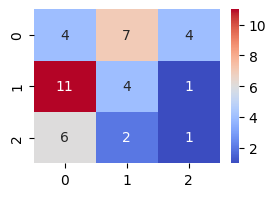

In [6]:
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1,average='macro'))
print(recall_score(y_test,y_pred1,average='macro'))
print(f1_score(y_test,y_pred1,average='macro'))
plt.figure(figsize=(3,2))
sb.heatmap(confusion_matrix(y_test,y_pred1),annot=True,cmap='coolwarm')

In [7]:
x = df[['Country','CO2_Emissions (in MT)','Energy_Consumption_Per_Capita (in MWh)','Renewable_Energy (%)']]
y = df['Pollution_Severity']
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2,random_state=42)

accuracy = 0
k = 0
for i in range(1,len(x_train)//2,2):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  if accuracy_score(y_test,y_pred) > accuracy:
    accuracy = accuracy_score(y_test,y_pred)
    k = i

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)
y_pred2 = knn.predict(x_test)

0.475
0.47996632996632993
0.4731481481481481
0.4677248677248677


<Axes: >

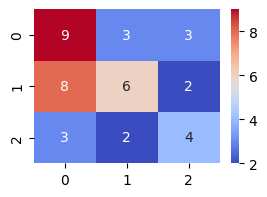

In [8]:
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2,average='macro'))
print(recall_score(y_test,y_pred2,average='macro'))
print(f1_score(y_test,y_pred2,average='macro'))
plt.figure(figsize=(3,2))
sb.heatmap(confusion_matrix(y_test,y_pred2),annot=True,cmap='coolwarm')

In [9]:
x = df[['Country','CO2_Emissions (in MT)','Energy_Consumption_Per_Capita (in MWh)','Renewable_Energy (%)']]
y = df['Pollution_Severity']
x_train,x_test,y_train,y_test = tts(x,y,test_size=0.2,random_state=42)

accuracy = 0
depth = 0
split = 0
for i in range(2,21):
  for j in [2,5,10,20,50]:
    dtree = DecisionTreeClassifier(max_depth=i,min_samples_split=j,random_state=42)
    dtree.fit(x_train,y_train)
    y_pred = dtree.predict(x_test)
    if accuracy_score(y_test,y_pred) > accuracy:
      accuracy = accuracy_score(y_test,y_pred)
      depth = i
      split = j

dtree = DecisionTreeClassifier(max_depth=depth,min_samples_split=split,random_state=42)
dtree.fit(x_train,y_train)
y_pred3 = dtree.predict(x_test)

0.425
0.4246031746031746
0.4152777777777778
0.41071428571428575


<Axes: >

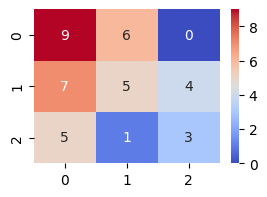

In [10]:
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3,average='macro'))
print(recall_score(y_test,y_pred3,average='macro'))
print(f1_score(y_test,y_pred3,average='macro'))
plt.figure(figsize=(3,2))
sb.heatmap(confusion_matrix(y_test,y_pred3),annot=True,cmap='coolwarm')

In this assignment Naives Bayes, KNN and Decision Tree is used to estimate the classification of pollution severity using country, CO2 emissions, energy consumption and renewable energy precentage. The scores achieved by both models given below;

## Naives Bayes
1. Accuracy Score: 0.225
2. Precision Score: 0.2216117216117216
3. Recall Score: 0.20925925925925926
4. F1 Score: 0.21047254150702424

## K Nearest Neighbor
1. Accuracy Score: 0.475
2. Precision Score: 0.47996632996632993
3. Recall Score: 0.4731481481481481
4. F1 Score: 0.4677248677248677

## Decision Tree
1. Accuracy Score: 0.425
2. Precision Score: 0.4246031746031746
3. Recall Score: 0.4152777777777778
4. F1 Score: 0.41071428571428575

Seems like this dataset is not good for these three model too. K Nearest Neighbor conquering the first position by accuracy. Tuning for K in KNN and depth,split in Decision Tree made them this much accurate. Used discretizer instead of standardization, because MultinomialNB requires count, which shouldn't be negative.